In [38]:
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import json
import re
from matplotlib import pyplot as plt
import numpy as np

In [6]:
################################################################ WebScrapping ################################################################
class WebScrapping:
  def __init__(self):
    self.driver = webdriver.Chrome()
    self.dict_= {}
    self.td = []

  def ranking_g_a(self):
    url = "https://www.espn.com.co/futbol/equipo/estadisticas/_/id/2690/liga/COL.1/vista/anotaciones"
    self.driver.get(url)
    colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
    listas = ["Goleador", "Asistencia"]
    
    i=0
    for categoria in colgroup:
      tr = categoria.find_elements(By.XPATH, "./tr")
      for jugador in tr:
        nombre = jugador.find_elements(By.XPATH, "./td")[1]
        partidos_jugados = jugador.find_elements(By.XPATH, "./td")[2]
        cantidad = jugador.find_elements(By.XPATH, "./td")[3]
        temp_dict = [{"nombre": nombre.text, "partidos_jugados": partidos_jugados.text, "cantidad": cantidad.text}]
        self.td.append(temp_dict)
      self.dict_.update({listas[i]: self.td})
      i+=1
    self.dict_ = {"ranking_g_a": self.dict_}
    return self.dict_

  def ranking_g_a_historico(self):
    years = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
    dict_ = {}

    for year in years:
      url = f"https://www.espn.com.co/futbol/equipo/estadisticas/_/id/2690/liga/COL.1/temporada/{year}/vista/anotaciones"
      self.driver.get(url)

      colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
      listas = ["Goleador", "Asistencia"]
      dict_temp={}
      i=0
      for categoria in colgroup:
        tr = categoria.find_elements(By.XPATH, "./tr")
        for jugador in tr:
          nombre = jugador.find_elements(By.XPATH, "./td")[1]
          partidos_jugados = jugador.find_elements(By.XPATH, "./td")[2]
          cantidad = jugador.find_elements(By.XPATH, "./td")[3]
          temp_dict = [{"nombre": nombre.text, "partidos_jugados": partidos_jugados.text, "cantidad": cantidad.text, "year": year}]
          self.td.append(temp_dict)
        dict_temp.update({listas[i]: self.td})
        i+=1

    dict_.update({"Ranking G/A": dict_temp})
    return dict_
  
  def ranking_tarjetas(self):
    url = "https://www.espn.com.co/futbol/equipo/estadisticas/_/id/2690/liga/COL.1/vista/tarjetas"
    self.driver.get(url)

    colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
    dict_={}
    for jugador in colgroup:
      tr = jugador.find_elements(By.XPATH, "./tr")
      for jugador in tr:
        nombre = jugador.find_elements(By.XPATH, "./td")[1]
        partidos_jugados = jugador.find_elements(By.XPATH, "./td")[2]
        tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td")[3]
        tarjetas_rojas = jugador.find_elements(By.XPATH, "./td")[4]
        temp_dict = [{"nombre": nombre.text, 
        "partidos_jugados": partidos_jugados.text, 
        "tarjetas_amarillas": tarjetas_amarillas.text, 
        "tarjetas_rojas": tarjetas_rojas.text}]
        self.td.append(temp_dict)
      dict_.update({"Tarjetas": self.td})
    return dict_
  
  def ranking_tarjetas_historico(self):
    years = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

    for year in years:
      url = f"https://www.espn.com.co/futbol/equipo/estadisticas/_/id/2690/liga/COL.1/temporada/{year}/vista/tarjetas"
      self.driver.get(url)

      colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
      for jugador in colgroup:
        tr = jugador.find_elements(By.XPATH, "./tr")
        for jugador in tr:
          nombre = jugador.find_elements(By.XPATH, "./td")[1]
          partidos_jugados = jugador.find_elements(By.XPATH, "./td")[2]
          tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td")[3]
          tarjetas_rojas = jugador.find_elements(By.XPATH, "./td")[4]
          temp_dict = [{"nombre": nombre.text, 
          "partidos_jugados": partidos_jugados.text, 
          "tarjetas_amarillas": tarjetas_amarillas.text, 
          "tarjetas_rojas": tarjetas_rojas.text, 
          "year": year}]
          self.td.append(temp_dict)
    self.dict_.update({"Tarjetas": self.td})
    return self.dict_

  def plantel(self):
    url = "https://www.espn.com.co/futbol/equipo/plantel/_/id/2690/col.independiente_medellin"
    self.driver.get(url)

    colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
    for tabla in colgroup:
      tr = tabla.find_elements(By.XPATH, "./tr")
      for jugador in tr:
        nombre = jugador.find_elements(By.XPATH, "./td/div/a")[0].text
        posicion = jugador.find_elements(By.XPATH, "./td/div")[1].text
        edad = jugador.find_elements(By.XPATH, "./td/div")[2].text
        altura = jugador.find_elements(By.XPATH, "./td/div")[3].text
        peso = jugador.find_elements(By.XPATH, "./td/div")[4].text
        nacionalidad = jugador.find_elements(By.XPATH, "./td/div")[5].text
        partidos_jugados = jugador.find_elements(By.XPATH, "./td/div")[6].text
        partidos_jugados_sustituto = jugador.find_elements(By.XPATH, "./td/div")[7].text

        if posicion == "G":
          atajadas = jugador.find_elements(By.XPATH, "./td/div")[8].text
          goles_concedidos = jugador.find_elements(By.XPATH, "./td/div")[9].text
          asistencias = jugador.find_elements(By.XPATH, "./td/div")[10].text
          faltas_cometidas = jugador.find_elements(By.XPATH, "./td/div")[11].text
          faltas_recibidas = jugador.find_elements(By.XPATH, "./td/div")[12].text
          tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td/div")[13].text
          tarjetas_rojas = jugador.find_elements(By.XPATH, "./td/div")[14].text

          self.td.append({"nombre": nombre, 
            "posicion": posicion, 
            "edad": edad, 
            "altura": altura, 
            "peso": peso, 
            "nacionalidad": nacionalidad, 
            "partidos_jugados": partidos_jugados, 
            "partidos_jugados_sustituto": partidos_jugados_sustituto, 
            "atajadas": atajadas, 
            "goles_concedidos": goles_concedidos, 
            "asistencias": asistencias, 
            "faltas_cometidas": faltas_cometidas, 
            "faltas_recibidas": faltas_recibidas, 
            "tarjetas_amarillas": tarjetas_amarillas, 
            "tarjetas_rojas": tarjetas_rojas})
          continue
        
        goles = jugador.find_elements(By.XPATH, "./td/div")[8].text
        asistencias = jugador.find_elements(By.XPATH, "./td/div")[9].text
        tiros = jugador.find_elements(By.XPATH, "./td/div")[10].text
        tiros_a_puerta = jugador.find_elements(By.XPATH, "./td/div")[11].text
        faltas_cometidas = jugador.find_elements(By.XPATH, "./td/div")[12].text
        faltas_recibidas = jugador.find_elements(By.XPATH, "./td/div")[13].text
        tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td/div")[14].text
        tarjetas_rojas = jugador.find_elements(By.XPATH, "./td/div")[15].text

        self.td.append({"nombre": nombre,
          "posicion": posicion,
          "edad": edad,
          "altura": altura,
          "peso": peso,
          "nacionalidad": nacionalidad,
          "partidos_jugados": partidos_jugados,
          "partidos_jugados_sustituto": partidos_jugados_sustituto,
          "goles": goles,
          "asistencias": asistencias,
          "tiros": tiros,
          "tiros_a_puerta": tiros_a_puerta,
          "faltas_cometidas": faltas_cometidas,
          "faltas_recibidas": faltas_recibidas,
          "tarjetas_amarillas": tarjetas_amarillas,
          "tarjetas_rojas": tarjetas_rojas})
      
    self.dict_.update({"Plantel": self.td})
    return self.dict_

  def plantel_historico(self):
    years = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
    for year in years:
      url = f"https://www.espn.com.co/futbol/equipo/plantel/_/id/2690/liga/COL.1/temporada/{year}"
      self.driver.get(url)
      colgroup = self.driver.find_elements(By.TAG_NAME, "tbody")
      
      for tabla in colgroup:
        tr = tabla.find_elements(By.XPATH, "./tr")
        for jugador in tr:
          nombre = jugador.find_elements(By.XPATH, "./td/div/a")[0].text
          posicion = jugador.find_elements(By.XPATH, "./td/div")[1].text
          edad = jugador.find_elements(By.XPATH, "./td/div")[2].text
          altura = jugador.find_elements(By.XPATH, "./td/div")[3].text
          peso = jugador.find_elements(By.XPATH, "./td/div")[4].text
          nacionalidad = jugador.find_elements(By.XPATH, "./td/div")[5].text
          partidos_jugados = jugador.find_elements(By.XPATH, "./td/div")[6].text
          partidos_jugados_sustituto = jugador.find_elements(By.XPATH, "./td/div")[7].text

          if posicion == "G":
            atajadas = jugador.find_elements(By.XPATH, "./td/div")[8].text
            goles_concedidos = jugador.find_elements(By.XPATH, "./td/div")[9].text
            asistencias = jugador.find_elements(By.XPATH, "./td/div")[10].text
            faltas_cometidas = jugador.find_elements(By.XPATH, "./td/div")[11].text
            faltas_recibidas = jugador.find_elements(By.XPATH, "./td/div")[12].text
            tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td/div")[13].text
            tarjetas_rojas = jugador.find_elements(By.XPATH, "./td/div")[14].text

            self.td.append({"nombre": nombre, 
              "posicion": posicion, 
              "edad": edad, 
              "altura": altura, 
              "peso": peso, 
              "nacionalidad": nacionalidad, 
              "partidos_jugados": partidos_jugados, 
              "partidos_jugados_sustituto": partidos_jugados_sustituto, 
              "atajadas": atajadas, 
              "goles_concedidos": goles_concedidos, 
              "asistencias": asistencias, 
              "faltas_cometidas": faltas_cometidas, 
              "faltas_recibidas": faltas_recibidas, 
              "tarjetas_amarillas": tarjetas_amarillas, 
              "tarjetas_rojas": tarjetas_rojas,
              "year": year})
            continue
          
          goles = jugador.find_elements(By.XPATH, "./td/div")[8].text
          asistencias = jugador.find_elements(By.XPATH, "./td/div")[9].text
          tiros = jugador.find_elements(By.XPATH, "./td/div")[10].text
          tiros_a_puerta = jugador.find_elements(By.XPATH, "./td/div")[11].text
          faltas_cometidas = jugador.find_elements(By.XPATH, "./td/div")[12].text
          faltas_recibidas = jugador.find_elements(By.XPATH, "./td/div")[13].text
          tarjetas_amarillas = jugador.find_elements(By.XPATH, "./td/div")[14].text
          tarjetas_rojas = jugador.find_elements(By.XPATH, "./td/div")[15].text

          self.td.append({"nombre": nombre,
            "posicion": posicion,
            "edad": edad,
            "altura": altura,
            "peso": peso,
            "nacionalidad": nacionalidad,
            "partidos_jugados": partidos_jugados,
            "partidos_jugados_sustituto": partidos_jugados_sustituto,
            "goles": goles,
            "asistencias": asistencias,
            "tiros": tiros,
            "tiros_a_puerta": tiros_a_puerta,
            "faltas_cometidas": faltas_cometidas,
            "faltas_recibidas": faltas_recibidas,
            "tarjetas_amarillas": tarjetas_amarillas,
            "tarjetas_rojas": tarjetas_rojas,
            "year": year})
    self.dict_.update({"Plantel": self.td})
    return self.dict_

  def calendario(self):
    url = "https://www.espn.com.co/futbol/equipo/calendario/_/id/2690/col.independiente_medellin"
    self.driver.get(url)

    tables = self.driver.find_elements(By.TAG_NAME, "tbody")
    for tabla in tables:
      tr = tabla.find_elements(By.XPATH, "./tr")
      for partido in tr:
        fecha = partido.find_elements(By.XPATH, "./td/div")[0].text
        equipo_local = partido.find_elements(By.XPATH, "./td")[1].text
        equipo_visitante = partido.find_elements(By.XPATH, "./td")[3].text
        if equipo_local == "Independiente Medellín":
          tipo = "local"
          rival = equipo_visitante
        else:
          tipo = "visitante"
          rival = equipo_local
        resultado = partido.find_elements(By.XPATH, "./td")[2].text
        self.td.append({"fecha": fecha, "rival": rival, "tipo":tipo, "resultado": resultado})

    self.dict_.update({"Calendario": self.td})
    return self.dict_

  def resultados(self):
    url = f"https://www.espn.com.co/futbol/equipo/resultados/_/id/2690/temporada/2023"
    time.sleep(3)
    self.driver.get(url)
    tbody = self.driver.find_elements(By.TAG_NAME, "tbody")

    for resultados in tbody:
      tr = resultados.find_elements(By.XPATH, "./tr")
      for partido in tr:
        fecha = partido.find_elements(By.XPATH, "./td/div")[0].text
        equipo_local = partido.find_elements(By.XPATH, "./td")[1].text
        equipo_visitante = partido.find_elements(By.XPATH, "./td")[3].text
        torneo = partido.find_elements(By.XPATH, "./td")[5].text
        if equipo_local == "Independiente Medellín":
          tipo = "local"
          rival = equipo_visitante
        else:
          tipo = "visitante"
          rival = equipo_local
        resultado_partido = partido.find_elements(By.XPATH, "./td")[2].text
        #Caso partido de vuelta con resultado diferente a 0 - 0 en la ida
        if re.findall(r"\bglobal\b", resultado_partido):
          resultados = re.search(r"(\d+\s*-\s*\d+).*?(\d+\s*-\s*\d+)", resultado_partido, re.DOTALL)
          resultado_global = " ".join(resultados.group(2))
          resultado_vuelta = resultados.group(1)
          resultado_ida = f"{int(resultado_global[0])-int(resultado_vuelta[0])} - {int(resultado_global[-1])-int(resultado_vuelta[-1])}"
          if re.findall(r"\bEmpate\b", resultado_partido):
            primera_posicion =  resultado_partido.find("·")
            ganador = resultado_partido[resultado_partido.find("·", primera_posicion + 1) + 1:re.search(r"(gana|ganó)", resultado_partido).start()].strip()
            penaltis = True
          else:
            ganador = resultado_partido[resultado_partido.find("·") + 1:re.search(r"(gana|ganó)", resultado_partido).start()].strip()
            penaltis = False
        #Caso partido de ida
        elif re.findall(r"\bIda\b", resultado_partido):
          resultado_global = ""
          resultado_vuelta = ""
          resultado_ida = str(re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," ")))[2:-2]
          if tipo == "local" and resultado_ida[0] > resultado_ida[-1]:
            ganador = "Independiente Medellín"
          elif tipo == "visitante" and resultado_ida[0] < resultado_ida[-1]:
            ganador = "Independiente Medellín"
          elif resultado_ida[0] == resultado_ida[-1]:
            ganador = "Empate"
          else: 
            ganador = rival
          penaltis = False
        #Caso partido de vuelta con resultado 0 - 0 en la ida
        elif re.findall(r"\bVuelta\b", resultado_partido):
          resultado_global = re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," "))
          resultado_vuelta = re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," "))
          resultado_ida = "0 - 0"
          if tipo == "local" and resultado_global[0] > resultado_global[-1]:
            ganador = "Independiente Medellín"
          elif tipo == "visitante" and resultado_global[0] < resultado_global[-1]:
            ganador = "Independiente Medellín"
          elif resultado_global[0] == resultado_global[-1]:
            ganador = "Empate"
          else: 
            ganador = rival
          penaltis = False
        #Caso partido sin ida y vuelta
        else:
          resultado_global = resultado_partido
          resultado_vuelta = ""
          resultado_ida = ""
          if tipo == "local" and resultado_global[0] > resultado_global[-1]:
            ganador = "Independiente Medellín"
          elif tipo == "visitante" and resultado_global[0] < resultado_global[-1]:
            ganador = "Independiente Medellín"
          elif resultado_global[0] == resultado_global[-1]:
            ganador = "Empate"
          else: 
            ganador = rival
          penaltis = False
        
        self.td.append({"fecha": fecha, 
        "rival": rival, 
        "tipo":tipo, 
        "resultado_global": resultado_global, 
        "resultado_ida": resultado_ida, 
        "resultado_vuelta": resultado_vuelta, 
        "ganador": ganador, 
        "penaltis": penaltis,
        "torneo": torneo
        })
    self.dict_.update({"Resultados": self.td})
    return self.dict_

  def resultados_historicos(self):
    years = ["2016", "2017", "2018", "2019", "2020", "2021", "2022"]

    for year in years:
      url = f"https://www.espn.com.co/futbol/equipo/resultados/_/id/2690/temporada/{year}"
      time.sleep(1)
      self.driver.get(url)
      tbody = self.driver.find_elements(By.TAG_NAME, "tbody")
      
      for resultados in tbody:
        tr = resultados.find_elements(By.XPATH, "./tr")
        for partido in tr:
          fecha = partido.find_elements(By.XPATH, "./td/div")[0].text
          equipo_local = partido.find_elements(By.XPATH, "./td")[1].text
          equipo_visitante = partido.find_elements(By.XPATH, "./td")[3].text
          torneo = partido.find_elements(By.XPATH, "./td")[5].text
          if equipo_local == "Independiente Medellín":
            tipo = "local"
            rival = equipo_visitante
          else:
            tipo = "visitante"
            rival = equipo_local
          resultado_partido = partido.find_elements(By.XPATH, "./td")[2].text
          #Caso partido de vuelta con resultado diferente a 0 - 0 en la ida
          if re.findall(r"\bglobal\b", resultado_partido):
            resultados = re.search(r"(\d+\s*-\s*\d+).*?(\d+\s*-\s*\d+)", resultado_partido, re.DOTALL)
            resultado_global = " ".join(resultados.group(2))
            resultado_vuelta = resultados.group(1)
            resultado_ida = f"{int(resultado_global[0])-int(resultado_vuelta[0])} - {int(resultado_global[-1])-int(resultado_vuelta[-1])}"
            if re.findall(r"\bEmpate\b", resultado_partido):
              primera_posicion =  resultado_partido.find("·")
              ganador = resultado_partido[resultado_partido.find("·", primera_posicion + 1) + 1:re.search(r"(gana|ganó)", resultado_partido).start()].strip()
              penaltis = True
            else:
              ganador = resultado_partido[resultado_partido.find("·") + 1:re.search(r"(gana|ganó)", resultado_partido).start()].strip()
              penaltis = False
          #Caso partido de ida
          elif re.findall(r"\bIda\b", resultado_partido):
            resultado_global = ""
            resultado_vuelta = ""
            resultado_ida = str(re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," ")))[2:-2]
            if tipo == "local" and resultado_ida[0] > resultado_ida[-1]:
              ganador = "Independiente Medellín"
            elif tipo == "visitante" and resultado_ida[0] < resultado_ida[-1]:
              ganador = "Independiente Medellín"
            elif resultado_ida[0] == resultado_ida[-1]:
              ganador = "Empate"
            else: 
              ganador = rival
            penaltis = False
          #Caso partido de vuelta con resultado 0 - 0 en la ida
          elif re.findall(r"\bVuelta\b", resultado_partido):
            resultado_global = re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," "))
            resultado_vuelta = re.findall(r"\b(\d+\s*-\s*\d+)\b", resultado_partido.replace("\n"," "))
            resultado_ida = "0 - 0"
            if tipo == "local" and resultado_global[0] > resultado_global[-1]:
              ganador = "Independiente Medellín"
            elif tipo == "visitante" and resultado_global[0] < resultado_global[-1]:
              ganador = "Independiente Medellín"
            elif resultado_global[0] == resultado_global[-1]:
              ganador = "Empate"
            else: 
              ganador = rival
            penaltis = False
          #Caso partido sin ida y vuelta
          else:
            resultado_global = resultado_partido
            resultado_vuelta = ""
            resultado_ida = ""
            if tipo == "local" and resultado_global[0] > resultado_global[-1]:
              ganador = "Independiente Medellín"
            elif tipo == "visitante" and resultado_global[0] < resultado_global[-1]:
              ganador = "Independiente Medellín"
            elif resultado_global[0] == resultado_global[-1]:
              ganador = "Empate"
            else: 
              ganador = rival
            penaltis = False
        
          self.td.append({"fecha": fecha, "rival": rival, 
          "tipo":tipo, 
          "resultado_global": resultado_global, 
          "resultado_ida": resultado_ida, 
          "resultado_vuelta": resultado_vuelta, 
          "ganador": ganador, 
          "penaltis": penaltis, 
          "año": year,
          "torneo": torneo})
    self.dict_.update({"Resultados": self.td})
    return self.dict_
  

In [8]:
# json_ranking_tarjetas = WebScrapping().ranking_tarjetas()
# with open('json_ranking_tarjetas.json', 'w') as file:
#     json.dump(json_ranking_tarjetas, file)

# json_ranking_tarjetas_historico =WebScrapping().ranking_tarjetas_historico()
# with open('json_ranking_tarjetas_historico.json', 'w') as file:
#     json.dump(json_ranking_tarjetas_historico, file)

# json_plantel =WebScrapping().plantel()
# with open('json_plantel.json', 'w') as file:
#     json.dump(json_plantel, file)

# json_plantel_historico =WebScrapping().plantel_historico()
# with open('json_plantel_historico.json', 'w') as file:
#     json.dump(json_plantel_historico, file)

# json_calendario =WebScrapping().calendario()
# with open('json_calendario.json', 'w') as file:
#     json.dump(json_calendario, file)

# json_resultados =WebScrapping().resultados()
# with open('json_resultados.json', 'w') as file:
#     json.dump(json_resultados, file)

json_resultados_historicos =WebScrapping().resultados_historicos()
with open('json_resultados_historicos.json', 'w') as file:
    json.dump(json_resultados_historicos, file)

In [9]:
resultados = pd.DataFrame(json.loads(open('json_resultados_historicos.json').read())["Resultados"])

In [63]:
df = pd.DataFrame(resultados.groupby(["rival", "ganador", "torneo"]).count()["fecha"]).sort_values(by="fecha", ascending=False).reset_index()
df.rename(columns={"fecha": "partidos ganados"}, inplace=True)

In [65]:

x = df[(df["torneo"] == "Colombian Primera A") & (df["rival"] == "Bucaramanga")]
x


,rival,ganador,torneo,partidos ganados
2,Bucaramanga,Independiente Medellín,Colombian Primera A,10
46,Bucaramanga,Empate,Colombian Primera A,3
71,Bucaramanga,Bucaramanga,Colombian Primera A,2


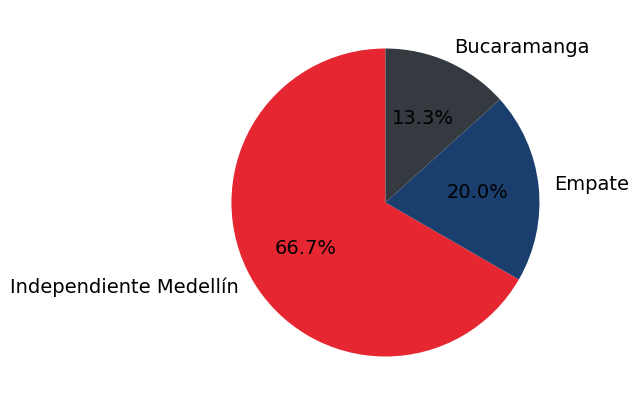

In [67]:
plt.figure(figsize=(10,5))
plt.pie(x["partidos ganados"], labels=x["ganador"], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, colors=["#E62732", "#1A3F6E", "#343a40"])
plt.show()